In [2]:
# conda activate carpred

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('car data.csv')

In [5]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
print(df['Fuel_Type'].unique())
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())
# print(df['Car_Name'].unique())


['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [7]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
df.shape

(301, 9)

In [10]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [11]:
df.describe(include=['object'])

,Car_Name,Fuel_Type,Seller_Type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


In [12]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [13]:
df_1 = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [14]:
df_1.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [15]:
df_1['current_year'] =2021
df_1['Yr_n'] = df_1['current_year'] - df_1['Year'] 
df_1.drop(columns=['current_year', 'Year'], inplace=True)

In [16]:
df_1.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Yr_n
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [17]:
df_1 = pd.get_dummies(df_1, drop_first=True)

In [18]:
df_1.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Yr_n,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [19]:
df_1.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'Yr_n',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'],
      dtype='object')

In [20]:
# ! conda info
!pip install seaborn
!pip install matplotlib

In [21]:
import seaborn as sns

<AxesSubplot:>

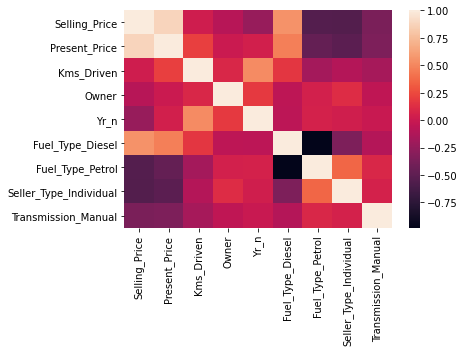

In [22]:
corr = df_1.corr()
sns.heatmap(corr)

In [23]:
!pip install scikit-learn


In [24]:
import sklearn
X = df_1.iloc[:, 1:]
y= df_1.iloc[:, 0]

In [25]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt

In [26]:
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [27]:
model.feature_importances_

array([0.3658261 , 0.03693787, 0.00043088, 0.07659332, 0.23176059,
       0.00736276, 0.13067265, 0.15041582])

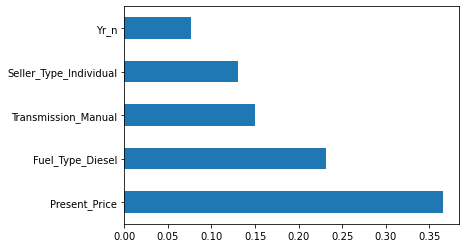

In [28]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2,random_state=101)

In [31]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [32]:
rf_model.predict(X_test)
rf_model.score(X_test, y_test)

0.7942033180354735

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Selling_Price'>

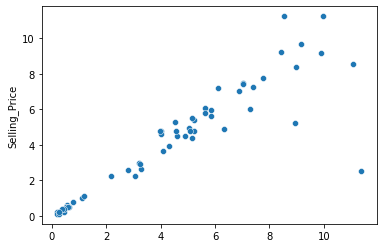

In [33]:
sns.scatterplot(rf_model.predict(X_test), y_test)

In [34]:
import numpy as np

In [35]:
# Randomized search CV
n_estimators= [int(x) for x in np.linspace(start=100, stop= 500, num=10)]
max_depth= [int(x) for x in np.linspace(start=5, stop=50, num=6)]
min_samples_split=[5,15,20,25,30]
min_samples_leaf= [1, 2, 5, 10]
max_features = ['auto', 'sqrt']

In [36]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 144, 188, 233, 277, 322, 366, 411, 455, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 14, 23, 32, 41, 50], 'min_samples_split': [5, 15, 20, 25, 30], 'min_samples_leaf': [1, 2, 5, 10]}


In [37]:

from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf_model, param_distributions = random_grid,scoring='neg_mean_squared_error',
                               n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [38]:

rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=23, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=100; total time=   0.0s
[CV] END max_depth=23, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=100; total time=   0.0s
[CV] END max_depth=23, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=100; total time=   0.0s
[CV] END max_depth=23, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=100; total time=   0.0s
[CV] END max_depth=23, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=100; total time=   0.0s
[CV] END max_depth=32, max_features=auto, min_samples_leaf=2, min_samples_split=30, n_estimators=277; total time=   0.2s
[CV] END max_depth=32, max_features=auto, min_samples_leaf=2, min_samples_split=30, n_estimators=277; total time=   0.2s
[CV] END max_depth=32, max_features=auto, min_samples_leaf=2, min_samples_split=30, n_estima

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 14, 23, 32, 41, 50],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [5, 15, 20, 25,
                                                              30],
                                        'n_estimators': [100, 144, 188, 233,
                                                         277, 322, 366, 411,
                                                         455, 500]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Selling_Price'>

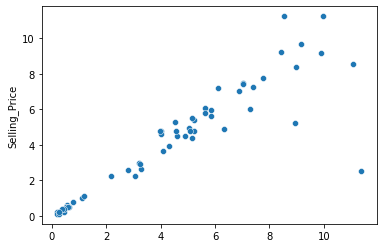

In [39]:
sns.scatterplot(rf_model.predict(X_test), y_test)

In [40]:
rf_random.score(X_test, y_test)

-5.49189504867386

In [41]:
import joblib

In [42]:
# joblib.dump(rf_model, 'car_pred.pkl')

['car_pred.pkl']

In [47]:
rf_model.predict([[10,24000,1,7, 1,0,0,1]])

array([6.3475])